<a href="https://colab.research.google.com/github/Lorrandauosso/Analise-exploratoria-EBC-Loggi/blob/main/original_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Para a realização deste projeto, faremos uso de uma base de dados fornecida pela Empresa Loggi, uma startup brasileira líder em soluções de logística. Iniciando suas operações entregando documentos entre 2013 e 2014, a Loggi expandiu para o segmento de comércio eletrônico dois anos depois e, desde 2017, incluiu as entregas de alimentos em seus serviços. Com investimentos de renomados parceiros, como SoftBank, Microsoft, GGV Capital, Monashees, Kaszek e outros, a Loggi está avaliada em US$ 1 bilhão. O Benchmark for Urban Deliveries (BUD), um repositório do GitHub mantido pela Loggi, fornece dados e códigos para desafios logísticos, como otimização de rotas e alocação de entregas. Esses dados, provenientes de fontes públicas como IBGE e IPEA, refletem os desafios diários enfrentados pela empresa, especialmente em termos de escala. Neste projeto, analisaremos dados relacionados ao Distrito Federal para otimizar as operações da empresa, explorar padrões, detectar anomalias e testar hipóteses, utilizando estatísticas resumidas e representações gráficas para obter insights e solucionar desafios de roteamento e localização.

**Principais Desafios:**


* Melhoria da Eficiência na Rota de Entregas: Procurar a rota mais otimizada entre os pontos de entrega, com o objetivo de reduzir tanto o tempo quanto os recursos necessários, promovendo uma logística mais veloz e financeiramente vantajosa.

* Distribuição de Cargas em Veículos com Capacidade Restrita: Estrategicamente alocar as cargas nos veículos da frota, considerando suas limitações de capacidade, visando maximizar a eficácia operacional e garantir o cumprimento dos prazos estabelecidos. O projeto será baseado em dados referentes ao Distrito Federal.














## 2\. Pacotes e bibliotecas

In [ ]:
!pip3 install geopandas
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import plotly
from geopy.extra.rate_limiter import RateLimiter



## 3\. Exploração de dados

In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [ ]:
with open("deliveries.json", mode="r", encoding="utf8") as file:
  data = json.load(file)
  deliveries_df = pd.DataFrame(data)



In [ ]:
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


## 4\. Manipulação

In [ ]:
hub_origin_df = pd.json_normalize(deliveries_df["origin"])
hub_origin_df

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145
...,...,...
194,-47.893662,-15.805118
195,-47.802665,-15.657014
196,-47.893662,-15.805118
197,-48.054989,-15.838145


Podemos combinar o novo conjunto de dados com o cojunto de dados original, usando o indice como ponto de referencia, e depois eliminar a coluna "origin" do conjunto de dados origiinal.

In [ ]:
# Mesclando os DataFrames com o método merge do pandas por um inner join através dos index
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)

# Excluindo a coluna "origin" original
deliveries_df = deliveries_df.drop("origin", axis=1)

# Selecionando e renomeando as novas colunas do DataFrame
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."
...,...,...,...,...,...,...
194,cvrp-1-df-59,df-1,-47.893662,-15.805118,180,"[{'id': 'fc800db1942651f8195f870c5930ca26', 'p..."
195,cvrp-0-df-87,df-0,-47.802665,-15.657014,180,"[{'id': '3d50e820e1c16621e1fa19f1a7df0c56', 'p..."
196,cvrp-1-df-83,df-1,-47.893662,-15.805118,180,"[{'id': 'e6cffd090ce2a7bd0e0292f1ed9acd3', 'po..."
197,cvrp-2-df-7,df-2,-48.054989,-15.838145,180,"[{'id': '51b1354b02a20d919b83bb664ea4d845', 'p..."


Ainda há dados aninhados em diferentes níveis na coluna "deliveries", nesse caso, utilizaremos o método "explode" que gera, para cada registro, uma nova linha mantendo o indice original, após isso, separar as informações em colunas e dataframes novos.

In [ ]:
# Aplicando o método "explode" à coluna "deliveries"
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_exploded_df

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."
...,...
198,"{'id': '21693bf442ac5890adbdf2648c12881a', 'po..."
198,"{'id': '7aaa35088b37b6e542c4cd69663a7ebf', 'po..."
198,"{'id': '60c00d5390da4f28167439cd9c566703', 'po..."
198,"{'id': '51f456963785e7381243ff7baf7efd06', 'po..."


In [ ]:
# Criando um DataFrame diferente com uma coluna de cada informação e concatenando em um único DataFrame
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["id"])).rename(columns={"deliveries":"delivery_id"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)

deliveries_normalized_df

,delivery_size,delivery_id,delivery_lng,delivery_lat
0,9,313483a19d2f8d65cd5024c8d215cfbd,-48.116189,-15.848929
0,2,320c94b17aa685c939b3f3244c3099de,-48.118195,-15.850772
0,1,3663b42f4b8decb33059febaba46d5c8,-48.112483,-15.847871
0,2,e11ab58363c38d6abc90d5fba87b7d7,-48.118023,-15.846471
0,7,54cb45b7bbbd4e34e7150900f92d7f4b,-48.114898,-15.858055
...,...,...,...,...
198,8,21693bf442ac5890adbdf2648c12881a,-48.064269,-15.997694
198,4,7aaa35088b37b6e542c4cd69663a7ebf,-48.065176,-16.003597
198,9,60c00d5390da4f28167439cd9c566703,-48.065841,-16.003808
198,1,51f456963785e7381243ff7baf7efd06,-48.062327,-16.001568


In [ ]:
# Excluindo a coluna "deliveries" original
deliveries_df = deliveries_df.drop("deliveries", axis=1)

# Mesclando o novo DataFrame deliveries_normalized_df com o DataFrame original deliveries_df, right join pelo index
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)

deliveries_df

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_id,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,313483a19d2f8d65cd5024c8d215cfbd,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,320c94b17aa685c939b3f3244c3099de,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,3663b42f4b8decb33059febaba46d5c8,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,e11ab58363c38d6abc90d5fba87b7d7,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,54cb45b7bbbd4e34e7150900f92d7f4b,-48.114898,-15.858055
...,...,...,...,...,...,...,...,...,...
636144,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,8,21693bf442ac5890adbdf2648c12881a,-48.064269,-15.997694
636145,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,4,7aaa35088b37b6e542c4cd69663a7ebf,-48.065176,-16.003597
636146,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,9,60c00d5390da4f28167439cd9c566703,-48.065841,-16.003808
636147,cvrp-2-df-62,df-2,-48.054989,-15.838145,180,1,51f456963785e7381243ff7baf7efd06,-48.062327,-16.001568


# Análise Exploratória

Agora, com os dados organizados em um DataFrame de forma adequada, avançaremos para a análise exploratória e o processo de depuração dos dados.








In [ ]:
# Ver as dimensões do DF
deliveries_df.shape

(636149, 9)

In [ ]:
# Conhecer os tipos de dados e as colunas.
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_id       636149 non-null  object 
 7   delivery_lng      636149 non-null  float64
 8   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 43.7+ MB


In [ ]:
# Identificar valores nulos
deliveries_df.isna().sum()

name                0
region              0
hub_lng             0
hub_lat             0
vehicle_capacity    0
delivery_size       0
delivery_id         0
delivery_lng        0
delivery_lat        0
dtype: int64

In [ ]:
# Contar valores distintos nas colunas.
deliveries_df.nunique()

name                   199
region                   3
hub_lng                  3
hub_lat                  3
vehicle_capacity         1
delivery_size           10
delivery_id         291566
delivery_lng        291566
delivery_lat        291566
dtype: int64

In [ ]:
# Ver um resumo estatístico dos dados numéricos.
deliveries_df.describe()

,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
count,636149.000000,636149.000000,636149.0,636149.000000,636149.000000,636149.000000
mean,-47.949902,-15.802359,180.0,5.512111,-47.946087,-15.809492
std,0.091875,0.053463,0.0,2.874557,0.112769,0.082462
min,-48.054989,-15.838145,180.0,1.000000,-48.280779,-16.050028
25%,-48.054989,-15.838145,180.0,3.000000,-48.035911,-15.842795
50%,-47.893662,-15.805118,180.0,6.000000,-47.928967,-15.814033
75%,-47.893662,-15.805118,180.0,8.000000,-47.883394,-15.769516
max,-47.802665,-15.657014,180.0,10.000000,-47.310611,-15.500355


Nota 1: É evidente que os dados da coluna "vehicle_capacity" não exibem variação, uma vez que todos os valores são consistentemente "180".
Nota 2: Os valores na coluna "delivery_size" revelam uma variação moderada nos volumes, com uma média de 5.5121 e uma mediana de 6.0000. Portanto, com um desvio padrão de 2.8746 e considerando a amplitude relativamente baixa, as variações são consideradas moderadas.








In [ ]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [ ]:
geolocator = Nominatim(user_agent="ebac_geocoder")
location = geolocator.reverse("-15.657013854445248, -47.802664728268745")

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656916027876347",
  "lon": "-47.80264463632131",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.10000999999999993,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "stat

In [ ]:
from geopy.extra.rate_limiter import RateLimiter

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
hub_df["coordinates"] = hub_df["hub_lat"].astype(str)  + ", " + hub_df["hub_lng"].astype(str)
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172757199022,-47.893723539491205,highway,residential,26,0.10001,...,Distrito Federal,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.00001,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


# Qualidade

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_id       636149 non-null  object 
 7   delivery_lng      636149 non-null  float64
 8   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 43.7+ MB


In [ ]:
deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_id         False
delivery_lng        False
delivery_lat        False
dtype: bool

## 5\. Visualização

 fazendo download do mapa do distrito federal a partir do site oficial do IBGE pelo link

In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

replace ./maps/ASB_Cemiterio_A.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

A partir daqui será selecionada apenas a região de interesse no DataFrame

In [ ]:
mapa = gpd.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


Posteriormente, criaremos um novo DataFrame que contém a localização exata dos hubs, bem como cada uma de suas entregas, o que será instrumental para a elaboração de um mapa que permitirá visualizar a distribuição dessas entregas.

In [ ]:
#Criando a localização pontual dos hubs na coluna geometry
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = gpd.GeoDataFrame(hub_df, geometry=gpd.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))
#geo_hub_df.head()

#Criando a localização pontual das entregas na coluna geometry
geo_deliveries_df = gpd.GeoDataFrame(deliveries_df, geometry=gpd.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
#geo_deliveries_df.head()

Agora, vamos criar um mapa que plota todas as localizações pontuais dos hubs e suas respectivas entregas.

<ipython-input-124-9d82417e407a>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


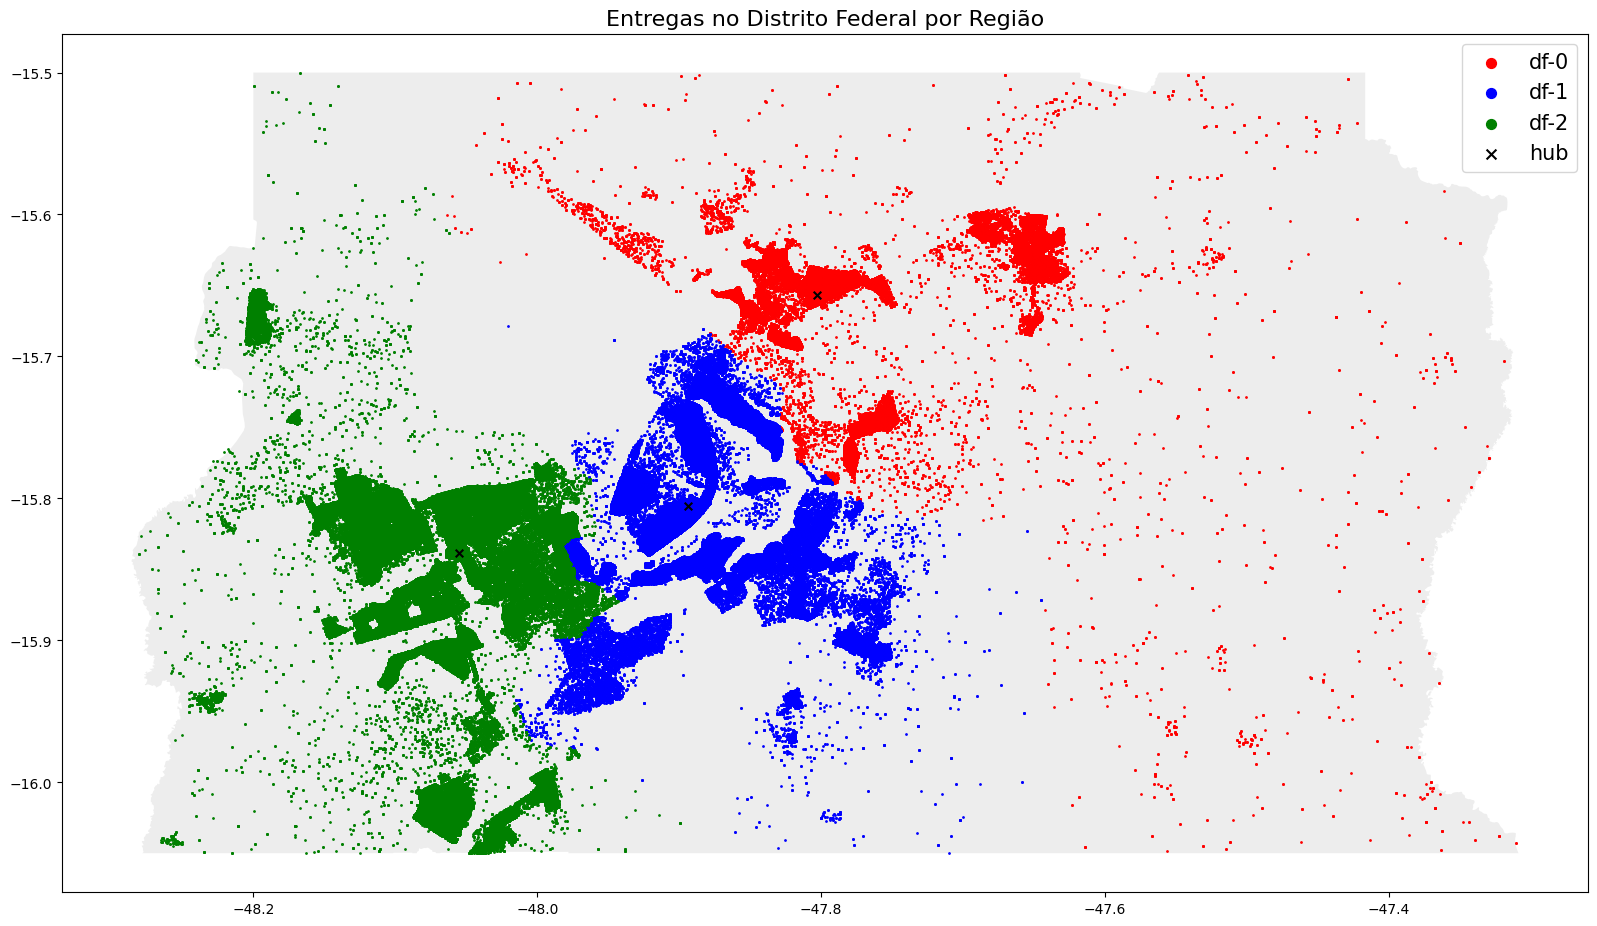

In [ ]:
# cria o plot vazio
fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# plot das entregas
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=1, color="red", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=1, color="blue", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=1, color="green", label="df-2")

# plot dos hubs
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="black", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

Um novo dataframe será gerado para visualizar a distribuição das entregas por hub.

In [ ]:
data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity', 'delivery_size']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "region_percent"}, inplace=True)
data = data.sort_values(by=['region', 'delivery_size'])
data.head(50)

,region,vehicle_capacity,delivery_size,region_percent
29,df-0,180,1,0.010663
24,df-0,180,2,0.011098
26,df-0,180,3,0.010873
20,df-0,180,4,0.011405
22,df-0,180,5,0.011233
21,df-0,180,6,0.011233
25,df-0,180,7,0.010903
27,df-0,180,8,0.010842
28,df-0,180,9,0.010840
23,df-0,180,10,0.011139


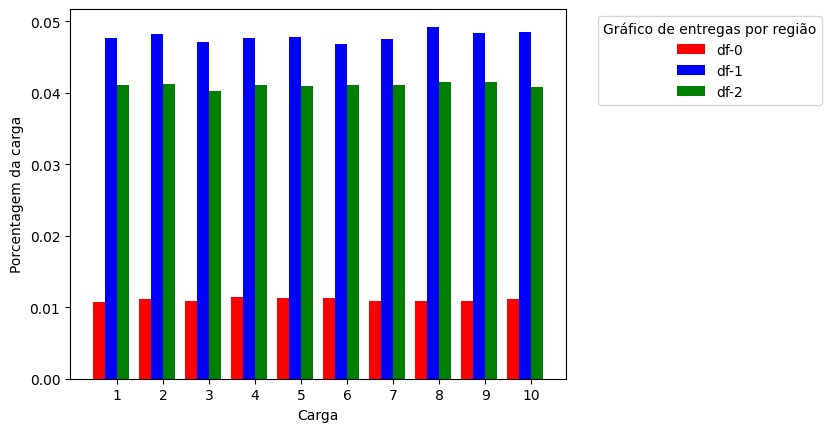

In [ ]:
# Primeiro, criei uma lista de cores para cada região
cores = {'df-0': 'red', 'df-1': 'blue', 'df-2': 'green'}

# Ajustando a largura das barras e a posição das barras para cada região
num_regioes = len(cores)
largura_barra = 0.8 / num_regioes
posicoes_barras = {}
for i, regiao in enumerate(cores.keys()):
    posicoes_barras[regiao] = np.arange(len(data['delivery_size'].unique())) + i * largura_barra

# Em seguida, um gráfico de barras para cada região
for regiao, cor in cores.items():
    dados_regiao = data[data['region'] == regiao]
    # Classifiquei os dados em ordem crescente de delivery_size
    dados_regiao = dados_regiao.sort_values(by='delivery_size')
    plt.bar(posicoes_barras[regiao], dados_regiao['region_percent'], width=largura_barra, color=cor, label=regiao)

# Ajustei os rótulos do eixo x para mostrar os valores de carga corretamente
plt.xticks(np.arange(len(data['delivery_size'].unique())) + largura_barra * num_regioes / 2, sorted(data['delivery_size'].unique()))

# Adicionei rótulos aos eixos x e y
plt.xlabel('Carga')
plt.ylabel('Porcentagem da carga')

# Adicionei uma legenda fora da área do gráfico
plt.legend(title='Gráfico de entregas por região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibição do gráfico
plt.show()

In [ ]:
df_agrupado = deliveries_df.groupby(['region', 'vehicle_capacity']).agg({'delivery_size':'sum'})
#df_agrupado.head()
data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "region_percent"}, inplace=True)

df_agrupado = pd.merge(left=df_agrupado, right=data, how="inner", on="region")
df_agrupado.head()

,region,delivery_size,vehicle_capacity,region_percent
0,df-0,385932,180,0.110229
1,df-1,1681582,180,0.478988
2,df-2,1439010,180,0.410783


Insights:

Uma observação inicial é que em algumas áreas as entregas dos hubs df-2 e df-1 se sobrepõem. Seria viável reajustar essas entregas para uma melhor segmentação das regiões de cada hub, facilitando a proximidade das entregas com o hub responsável. No entanto, é notável que os três hubs estão estrategicamente posicionados no mapa, quase no centro do distrito e próximos entre si, o que pode facilitar a troca de mercadorias, materiais e veículos entre eles.

Ao analisar o gráfico "Gráfico de entregas por região" em conjunto com o DataFrame "df_agrupado", percebe-se que uma grande proporção das entregas está fora do hub df-0, mesmo com sua capacidade de carga igual aos outros hubs. A análise do gráfico sugere que o motivo não é apenas o tamanho das cargas enviadas pelo hub df-0, pois ele tem menos cargas de todos os tamanhos, não apenas menos entregas. Assim, uma redistribuição de veículos entre os hubs pode ser uma estratégia eficaz para evitar desperdício de espaço nos caminhões.

Conclusão: Embora o segundo insight sugira uma possível solução, é importante considerar outras variáveis, como os prazos de entrega, que não foram analisados devido à falta de informações. Além disso, o hub df-0 enfrenta o desafio de ter muitas entregas localizadas em áreas extremamente afastadas do hub, o que pode exigir sua capacidade de carga para garantir entregas dentro do prazo, mesmo que haja espaço disponível nos veículos.